In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data=data.drop('Unnamed: 0',axis=1)

In [8]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

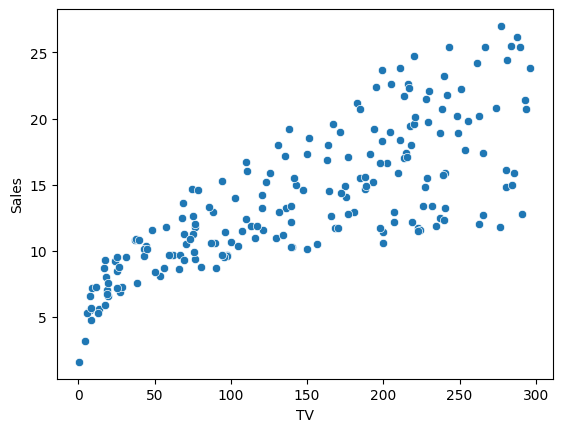

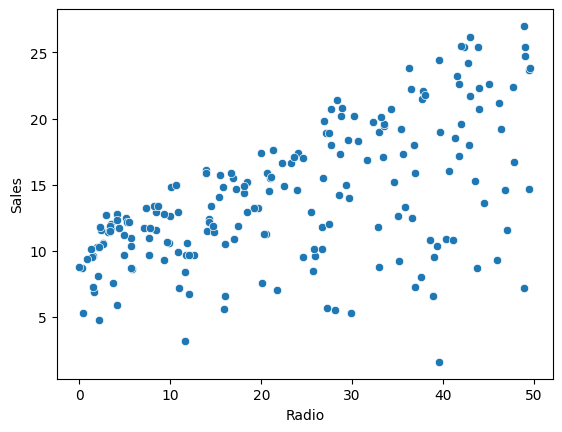

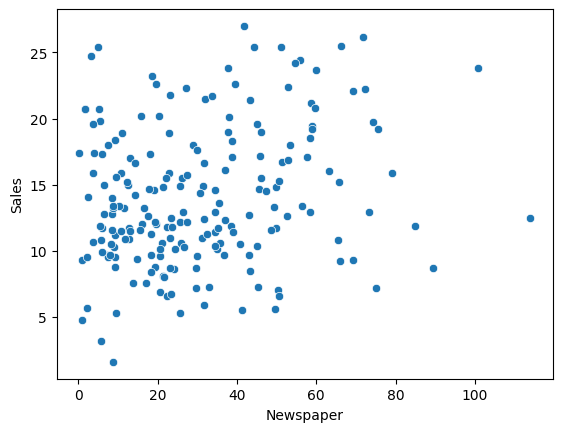

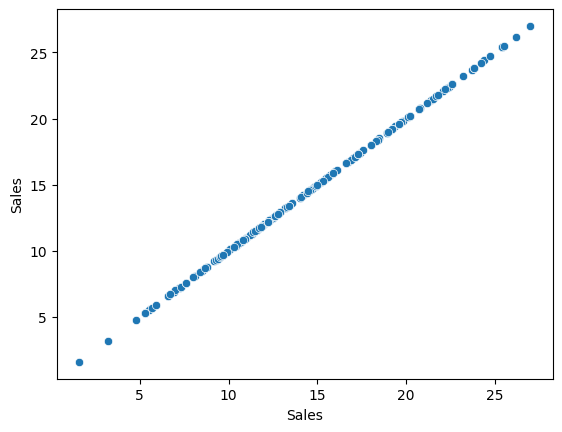

In [11]:
# data['TV'].value_counts().plot(kind="")
for col in data.columns:
  sns.scatterplot(x=col,y='Sales',data=data)
  plt.xlabel(col)
  plt.ylabel("Sales")
  plt.show()

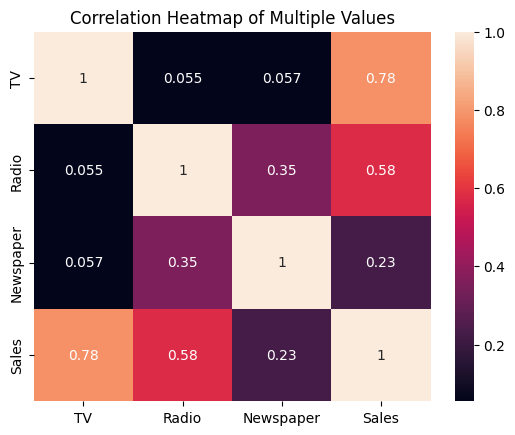

In [12]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap of Multiple Values')
plt.show()


In [13]:
y=data['Sales']
x=data.drop('Sales',axis=1)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [16]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=100, random_state=42),ExtraTreesRegressor(),GradientBoostingRegressor(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [17]:
from sklearn.metrics import accuracy_score,r2_score,precision_score,f1_score,mean_absolute_percentage_error,mean_squared_error
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(f'{model}:')
  print("r2_score: ",r2_score(y_pred,y_test))
  print("score",model.score(x_test, y_pred))
  print("mape",mean_absolute_percentage_error(y_test,y_pred)*100)
  print("mse",mean_squared_error(y_test,y_pred))


LinearRegression():
r2_score:  0.8833906188564258
score 1.0
mape 12.38755755551396
mse 2.7423872265866764
RandomForestRegressor(random_state=42):
r2_score:  0.9671817531650218
score 1.0
mape 5.772849024007097
mse 0.7645269928571419
ExtraTreesRegressor():
r2_score:  0.9853900671980277
score 1.0
mape 4.339921935378327
mse 0.39683954285714307
GradientBoostingRegressor():
r2_score:  0.9541030113816583
score 1.0
mape 6.633370014482192
mse 1.2581114059637648
KNeighborsRegressor():
r2_score:  0.8111140310380589
score 1.0
mape 10.975932969602479
mse 3.5356057142857145
DecisionTreeRegressor():
r2_score:  0.9053446945728278
score 1.0
mape 9.802622640199193
mse 2.6322142857142854


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone



model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2=GradientBoostingRegressor()
model3 =ExtraTreesRegressor()

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)

meta_features = np.column_stack((pred1, pred2,pred3))

meta_regressor = ExtraTreesRegressor()

meta_regressor.fit(meta_features, y_test)

final_pred = meta_regressor.predict(meta_features)

mse = mean_squared_error(y_test, final_pred)
print("r2_score: ",r2_score(y_test,final_pred))
print("mape",mean_absolute_percentage_error(y_test,final_pred)*100)
print("mse",mean_squared_error(y_test,final_pred))



r2_score:  0.9999999816189007
mape 0.001192910485926478
mse 4.999999999986591e-07


In [19]:
data.sample(2)

,TV,Radio,Newspaper,Sales
23,228.3,16.9,26.2,15.5
102,280.2,10.1,21.4,14.8


In [20]:
data2=pd.DataFrame({'TV':[175.1],'Radio':[22.0],'Newspaper':[31.5]})
final_pred1= (models[2]).predict(data2)
final_pred2= meta_regressor.predict(data2)
print(final_pred1[0])
print(final_pred2[0])

15.123000000000012
24.72100000000002


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


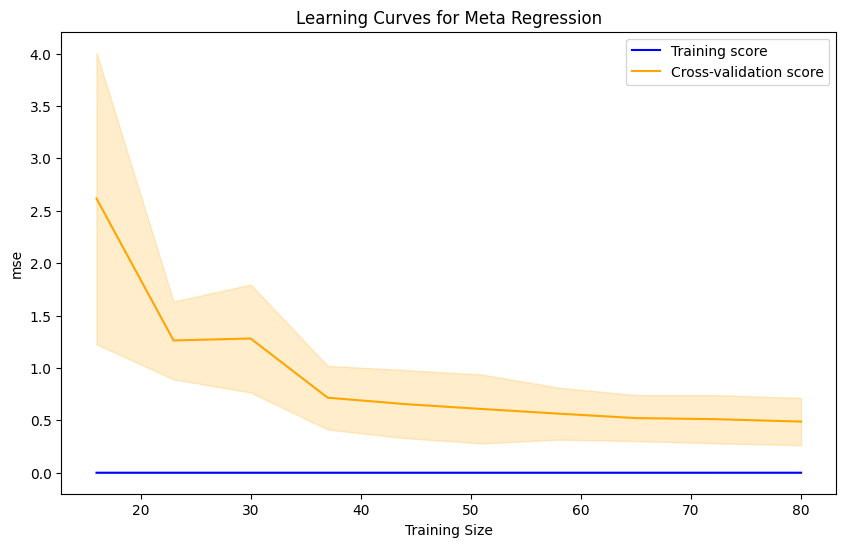

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    meta_regressor, x, y, train_sizes=np.linspace(0.1, 0.5, 10),
    scoring='neg_mean_squared_error', cv=5
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='orange')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

plt.xlabel('Training Size')
plt.ylabel('mse')
plt.title('Learning Curves for Meta Regression')
plt.legend()
plt.show()


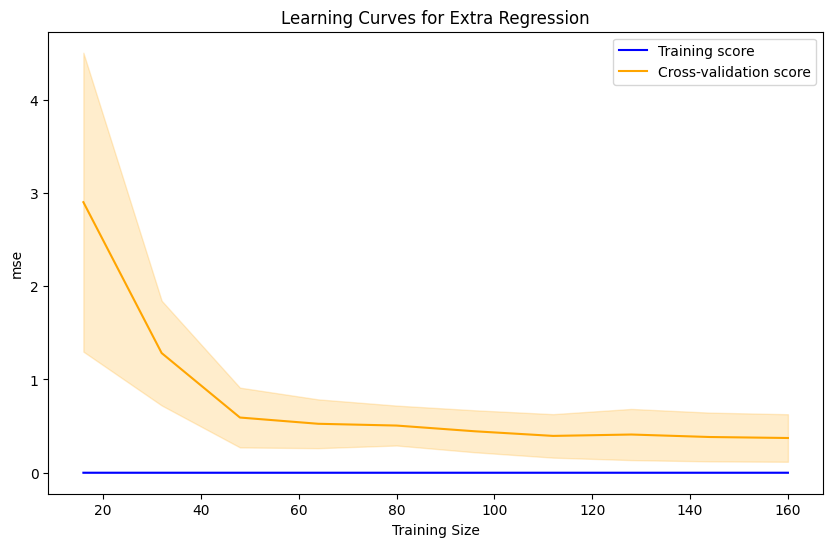

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    ExtraTreesRegressor(), x, y, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error', cv=5
)

train_scores = -train_scores
test_scores = -test_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='orange')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

plt.xlabel('Training Size')
plt.ylabel('mse')
plt.title('Learning Curves for Extra Regression')
plt.legend()
plt.show()


By observing graph we can conclude that using Extra tree regression model performs better. And increase in train size mean squared error is gradually decrease.

We Can conclude that ExtratreeRegression gives best performance with accuracy of r2_score:0.98